In [284]:
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Load training and test set from folder model_data in preprocessed_data

In [285]:
# read text from training and test set
# for DEMONSTRATION PURPOSES, the entire training set will be used to train the models and also as a test set
train_yellow = pd.read_csv(r"../preprocessed_data/model_data/train_yellow.csv", index_col = False, delimiter = ',', header=0)
test_yellow = pd.read_csv(r"../preprocessed_data/model_data/test_yellow.csv", index_col = False, delimiter = ',', header = 0)

# print "finish" once the csv files are read
print("finish")

finish


# Assign temperory name (0~6) for each feature for feature selection usage

In [287]:
# To avoid overfitting, apply stratification to select subsample data and start backward elimination
stratify_selection, subsample_selection = train_test_split(train_yellow, test_size = 0.05, stratify = train_yellow[['covid_count']])

# Set preditor features and target feature
x = subsample_selection[['trip_distance', 'duration', 'tolls_amount', 'payment_card', 'covid_count', 'comfort_index']]
y = subsample_selection['tip_amount']

# Print out summary of current model, compare each feature's p-value with 0.05 to judge whether remove it or not
x = np.append(arr = np.ones((len(subsample_selection["duration"]),1)).astype(int), values = x, axis = 1)
x_opt = x[:, [0, 1, 2, 3, 4, 5, 6]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.447e+05
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:36:49   Log-Likelihood:            -1.7730e+06
No. Observations:              882208   AIC:                         3.546e+06
Df Residuals:                  882201   BIC:                         3.546e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1594      0.007   -177.737      0.000      -1.172      -1.147
x1             0.2369      0.001    199.419      0.000       0.235       0.239
x2             0.0400      0.000    127.547      0.000       0.039       0.041
x3             0.2680      0.002    128.556      0.000       0.264       0.272
x4             2.7745      0.004    625.691      0.000       2.766       2.783
x5          2.711e-07   3.45e-06      0.078      0.937    -6.5e-06    7.04e-06
x6            -0.0064      0.001     -6.302      0.000      -0.008      -0.004
==============================================================================
Omnibus:                  3409416.564   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   17244063201277.143
Skew:                          91.097   Prob(JB):                         0.00
Kurtosis:                   21661.310   Cond. No.                     2.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [288]:
# Remove feature "covid_count" as it is the most insignificant feature and fit the model with remaining features
x_opt = x[:, [0, 1, 2, 3, 4, 6]]
ols = sm.OLS(endog = y, exog = x_opt).fit()

# from this model's summary, no features are insiginificant base on alpha = 0.05
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.737e+05
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:37:09   Log-Likelihood:            -1.7730e+06
No. Observations:              882208   AIC:                         3.546e+06
Df Residuals:                  882202   BIC:                         3.546e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1592      0.006   -188.313      0.000      -1.171      -1.147
x1             0.2369      0.001    199.990      0.000       0.235       0.239
x2             0.0400      0.000    128.099      0.000       0.039       0.041
x3             0.2680      0.002    128.628      0.000       0.264       0.272
x4             2.7745      0.004    625.838      0.000       2.766       2.783
x5            -0.0064      0.001     -6.550      0.000      -0.008      -0.005
==============================================================================
Omnibus:                  3409416.597   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   17244052417054.686
Skew:                          91.097   Prob(JB):                         0.00
Kurtosis:                   21661.303   Cond. No.                         60.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot the learning curve of the linear model with significant features

In [345]:
# use subsample of training set data to plot learning curve
stratify, subsample = train_test_split(train_yellow, test_size = 0.1, stratify = train_yellow[['comfort_index']])

x_learn = subsample[['trip_distance', 'duration', 'tolls_amount','comfort_index', 'payment_card']]
y_learn = subsample['tip_amount']

train_sizes, train, valid = learning_curve(estimator = LinearRegression(), X = x_learn, y = y_learn, train_sizes = np.linspace(0.1, 1, num=12), cv=2)

In [346]:
# https://mlcourse.ai/articles/topic4-part5-validation/
def plot_curve(x, data, **kwargs):
    mu = data.mean(1)
    lines = plt.plot(x, mu, "-", **kwargs)

def plot_learning_curve(N_train, val_train, val_valid, titleName):
    plot_curve(N_train, val_train, label="training R2 score")
    plot_curve(N_train, val_valid, label="validation R2 score")
    plt.title(titleName)
    plt.xlabel("Training Set Size")
    plt.ylabel("R2 Score")
    plt.legend()
    plt.savefig("../plots/learning_curve.png")

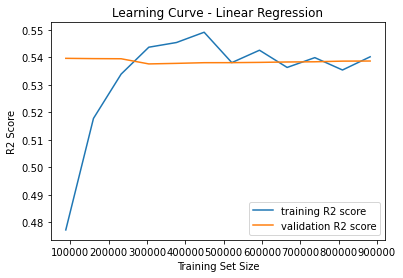

In [347]:
plot_learning_curve(train_sizes, train, valid, "Learning Curve - Linear Regression")

# Fit the linear model with training set's subsample (stratified)

In [348]:
stratify_test, subtest = train_test_split(test_yellow, test_size = 0.1, stratify = test_yellow[['covid_count']])
x_test = subtest[['trip_distance', 'duration', 'tolls_amount', 'comfort_index', 'payment_card']]
y_test = subtest['tip_amount']
reg = LinearRegression().fit(x_learn, y_learn)

# Test & score the model with test set's subsample (stratified)
# Print out the coefficient value of each significant features

In [349]:
r2_score = reg.score(x_test, y_test)
print(r2_score)
print(reg.intercept_.round(4))
print(reg.coef_.round(4))

0.5969353880204019
-1.1765
[ 0.2471  0.0395  0.2304 -0.0063  2.7823]
